In [3]:
### PREAMBLE
# Basics of probability
# probability.svg
# Zico Kolter

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import pprint
import itertools
import scipy.misc as misc

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

# Introducción a las probabilidades

## Introducción

* Hasta el momento, solo hemos hablado de métodos de optimización como parte importante del aprendizaje automático.
* Si bien es útil comprender el aprendizaje automático desde el punto de vista de la **optimización**, el aprendizaje automático como campo también está profundamente ligado a la **probabilidad y las estadísticas**, y el objetivo de esta clase es proporcionar una introducción básica a algunos de los principios detrás de la probabilidad. 
* Estadísticas = probabilidad + datos

## Introducción

Como ejemplo concreto de por qué la comprensión y el modelado de probabilidades pueden ser tan importantes en la ciencia de datos (este es, por supuesto, solo un ejemplo), volvamos a considerar el ejemplo anterior sobre la relación de temperatura y demanda máxima.

Text(0, 0.5, 'Peak Demand')

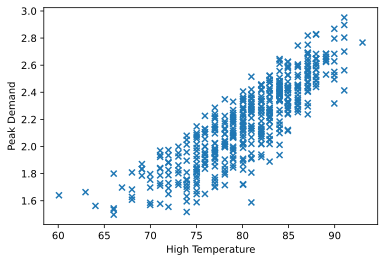

In [31]:
df = pd.read_csv("temp_demand.csv").set_index("Date")
df_summer = df[list(map(lambda x : str(x)[4:6] in ["06", "07", "08"], df.index))].copy()
plt.scatter(df_summer["Temp"], df_summer["Load"], marker='x')
plt.xlabel("High Temperature")
plt.ylabel("Peak Demand")

## Probabilidad e incertidumbre en la ciencia de datos 

* En muchas tareas de predicción, nunca podremos lograr una precisión perfecta (hay algo de aleatoriedad inherente en el nivel en el que podemos observar los datos) 
* En estas situaciones, es importante comprender la **incertidumbre** asociada con nuestras predicciones.

## Variables aleatorias

* Una **variable aleatoria** (informalmente) es una variable cuyo valor no se conoce inicialmente. 
* En cambio, estas variables pueden tomar diferentes valores (incluido un número posiblemente infinito), y deben tomar exactamente uno de estos valores, cada uno con una probabilidad asociada, que todos juntos suma a uno.
* Por ejemlplo, el tiempo (_"Weather"_) puede tomar valores tales como $\{sunny, rainy, cloudy, snowy\}$.

\begin{equation}
\begin{split}
p(\mbox{Weather} = \mbox{sunny}) & = 0.3\\
p(\mbox{Weather} = \mbox{rainy}) & = 0.2\\
\vdots
\end{split}
\end{equation}

* Esta notación difiere ligeramente con respecto a las variables aleatorias continuas que serán discutidas más adelante.

## Variables aleatorias

\begin{equation}
\begin{split}
p(\mbox{Weather} = \mbox{sunny}) & = 0.3\\
p(\mbox{Weather} = \mbox{rainy}) & = 0.2\\
\vdots
\end{split}
\end{equation}

* Esta notación difiere ligeramente con respecto a las **variables aleatorias continuas** que serán discutidas más adelante.

## Notación de las variables aleatorias

* Utilizaremos **letras en mayúsculas** para denotar variables aleatorias.
* Para la variable aleatoria, $X$ puede tomar valores $\{1,2,3\}$.

\begin{equation}
p(\mbox{X}) = \left \{ 
\begin{array}{lr}
\mbox{1:} & 0.1 \\
\mbox{2:} & 0.5 \\
\mbox{3:} & 0.4\\
\end{array} \right .
\end{equation}

representa un mapeo de valores a números de probabilidades que suman uno (otra notación, se pùede usar $p_X$ pero esto no es común).

* En Python se puede representar como un diccionario:


In [6]:
pX = {1: 0.1, 2: 0.5, 3:0.4}
pWeather = {"sunny": 0.3, "rainy":0.2, "cloudy":0.4, "snowy":0.1}

## Notación de las variables aleatorias


* Usaremos minúsculas $x$ para denotar un valor específico de $X$ (es decir, para el ejemplo anterior donde  $x \in  \{1,2,3\}$), y $p(X=x)$ o solo $p(x)$ se refiere a la entrada de $P(X)$.
* Nuevamente en el código, esto se parecería a lo siguiente.



In [21]:
pX[1]
print(f'p(X=1)={pX[1]}')
      
pWeather["sunny"]
print(f'p(Weather=sunny)={pWeather["sunny"]}')

p(X=1)=0.1
p(Weather=sunny)=0.3


## Ejemplos de notación de probabilidad

Dada dos **variables aleatorias**: $X_1$ con valores $\{1,2,3\}$ y $X_2$ con valores $\{1,2\}$:

* $p(X_1,X_2)$ se refiere a la **distribución conjunta**, un conjunto de 6 valores posibles para cada configuración de variables, es decir, un diccionario que asigna (1,1), (1,2), (2,1), ..., (3,2) las probabilidades correspondientes).
* $p(x_1, x_2)$ es un número: La probablidad donde $X_1 = x_1$ y $X_2 = x_2$.
* $p(X_1, x_2)$ es un conjunto de tres valores, la probabilidad de todos los valores de $X_1$ para el valor dado $X_2=x_2$. (nota: no es distribución de probabilidad, no sumará uno).

Generalmente llamamos a todos estos **términos** _factores_ (diccionarios que asignan valores a números, incluso si no suman uno)


## Ejemplos de notación de probabilidad

Dada dos **variables aleatorias**: $X_1$ con valores $\{1,2,3\}$ y $X_2$ con valores $\{1,2\}$:



In [24]:
# Definición de probabilidad conjunta

pX1X2 = {(1,1): 0.3, (1,2):0.1, (2,1):0.05, (2,2): 0.25, (3,1):0.15, (3,2):0.15}
print(f'Distribución de probabilidades: {pX1X2}')

# Acceso a una una entrada de la distribución p(x1, x2)
print(f'Probabilidad conjunta para p(x1=1, x2=2): {pX1X2[(1,2)]}')  

Distribución de probabilidades: {(1, 1): 0.3, (1, 2): 0.1, (2, 1): 0.05, (2, 2): 0.25, (3, 1): 0.15, (3, 2): 0.15}
Probabilidad conjunta para p(x1=1, x2=2): 0.1


## Ejemplos de notación de probabilidad

* Para calcular $p(X_1, x_2)$.
    * $p(x_1=1, x_2=2)$
    * $p(x_1=2, x_2=2)$
    * $p(x_1=3, x_2=2)$



In [30]:
fX1 = {k[0]:v for k,v in pX1X2.items() if k[1] == 2}

print(fX1)

print(pX1X2.items())


{1: 0.1, 2: 0.25, 3: 0.15}
dict_items([((1, 1), 0.3), ((1, 2), 0.1), ((2, 1), 0.05), ((2, 2), 0.25), ((3, 1), 0.15), ((3, 2), 0.15)])


## Ejemplo: Caries y el tiempo (I)

El **Tiempo** describe una variable aleatoria que toma los valores $\{\mbox{sunny}, \mbox{rainy}, \mbox{cloudy}\}$ y **Caries** es una variable aleatoria que toma los valores $\{\mbox{yes}, \mbox{no}\}$.

\begin{equation}
p(\mbox{Weather}, \mbox{Cavity}) = \left \{ 
\begin{array}{llr}
\mbox{sunny} & \mbox{yes} & 0.07 \\
\mbox{sunny} & \mbox{no} & 0.63 \\
\mbox{rainy} & \mbox{yes} & 0.02 \\
\mbox{rainy} & \mbox{no} & 0.18 \\
\mbox{cloudy} & \mbox{yes} & 0.01 \\
\mbox{cloudy} & \mbox{no} & 0.09
\end{array} \right .
\end{equation}

Si nos referimos a una entrada simple:
\begin{equation}
p(\mbox{Weather} = \mbox{sunny}, \mbox{Cavity} = \mbox{yes}) = 0.07.
\end{equation}



## Ejemplo: Caries y el tiempo (II)

\begin{equation}
p(\mbox{Weather}, \mbox{Cavity}) = \left \{ 
\begin{array}{llr}
\mbox{sunny} & \mbox{yes} & 0.07 \\
\mbox{sunny} & \mbox{no} & 0.63 \\
\mbox{rainy} & \mbox{yes} & 0.02 \\
\mbox{rainy} & \mbox{no} & 0.18 \\
\mbox{cloudy} & \mbox{yes} & 0.01 \\
\mbox{cloudy} & \mbox{no} & 0.09
\end{array} \right .
\end{equation}

O si queremos mirar un factor parcial.
\begin{equation}
p(\mbox{Weather}, \mbox{Cavity} = \mbox{yes}) = \left \{ 
\begin{array}{lr}
\mbox{sunny} & 0.07 \\
\mbox{rainy} & 0.02 \\
\mbox{cloudy} & 0.01 \\
\end{array} \right .
\end{equation}



## Ejemplo: Caries y el tiempo (III)


En Python tenemos:


In [17]:
pWeatherCavity = {("sunny", "yes"):0.07,
                  ("sunny", "no"):0.63,
                  ("rainy", "yes"):0.02,
                  ("rainy", "no"):0.18,
                  ("cloudy", "yes"):0.01,
                  ("cloudy", "no"):0.09}
pprint.pprint(pWeatherCavity)
print(pWeatherCavity[("sunny", "yes")])
fWeather = {k[0]:v for k,v in pWeatherCavity.items() if k[1] == "yes"}
pprint.pprint(fWeather)

{('cloudy', 'no'): 0.09,
 ('cloudy', 'yes'): 0.01,
 ('rainy', 'no'): 0.18,
 ('rainy', 'yes'): 0.02,
 ('sunny', 'no'): 0.63,
 ('sunny', 'yes'): 0.07}
0.07
{'cloudy': 0.01, 'rainy': 0.02, 'sunny': 0.07}


## Operaciones sobre probabilidades/factores

* Podemos realizar operaciones sobre probabilidades y factores.
* Por ejemplo, dado tres variables aleatorias $X_1, X_2, X_3$:

\begin{equation}
p(X_1,X_2)p(X_2,X_3)?
\end{equation}

\begin{equation}
f(X_1 = x_1, X_2 = x_2, X_3 = x_3) = p(X_1 = x_1, X_2 = x_2)p(X_2 = x_2,X_3 = x_3)
\end{equation}



In [18]:
pX1X2 = {(0,0):0.1, (0,1):0.2, (1,0):0.3, (1,1):0.4}
pX2X3 = {(0,0):0.2, (0,1):0.3, (1,0):0.3, (1,1):0.2}

f = {(k1[0], k1[1], k2[1]):v1*v2
     for (k1,v1),(k2,v2) in itertools.product(pX1X2.items(),pX2X3.items())
     if k1[1] == k2[0]}
pprint.pprint(f)


{(0, 0, 0): 0.020000000000000004,
 (0, 0, 1): 0.03,
 (0, 1, 0): 0.06,
 (0, 1, 1): 0.04000000000000001,
 (1, 0, 0): 0.06,
 (1, 0, 1): 0.09,
 (1, 1, 0): 0.12,
 (1, 1, 1): 0.08000000000000002}


## Probabilidad condicional


La **probabilidad condicional** $p(X_1 \mid X_2)$ (la probabilidad condicional de $X_1$ dado $X_2$) es definida como:

\begin{equation}
p(X_1 \mid X_2) = \frac{p(X_1,X_2)}{p(X_2)}.
\end{equation}

Y puede ser escrita como: 
\begin{equation}
p(X_1,X_2) = p(X_1 \mid X_2) p(X_2)
\end{equation}

O en su orden opuesto:
\begin{equation}
p(X_1,X_2) = p(X_2 \mid X_1) p(X_1)
\end{equation}


## Marginalización


Para las variables aleatorias $X_1$, $X_2$ con una **distribución conjunta** $p(X_1, X_2)$.

\begin{equation}
p(X_1) = \sum_{x_2} p(X_1,x_2)
\end{equation}

Generalizamos la distribución conjunta sobre múltiples variables aleatorias.

\begin{equation}
p(X_1, \ldots, X_i) = \sum_{x_{i+1}, \ldots, x_n} P(X_1,\ldots,X_i, x_{i+1}, \ldots, x_n)
\end{equation}

Para $p$ sea una distribución de probabilidad, la marginación sobre todas las variables debe ser uno.

\begin{equation}
\sum_{x_{1}, \ldots, x_n} P(x_1, \ldots, x_n) = 1.
\end{equation}

## Regla de Bayes

La regla se Bayes:

\begin{equation}
p(X_1 \mid X_2) = \frac{p(X_2 \mid X_1)p(X_1)}{\sum_{x_1} p(X_2 \mid x_1)p(x_1)}
\end{equation}

Se puede obtener, combinando las definiciones de **probabilidad condicional** y **marginalización**

\begin{equation}
p(X_1 \mid X_2) = \frac{p(X_1,X_2)}{p(X_2)} = \frac{p(X_2 \mid X_1)p(X_1)}{\sum_{x_1} p(X_2 \mid x_1)p(x_1)}.
\end{equation}



## Regla de Bayes

Si la tasa de gripe ocurre en solo 1 / 10,000 personas. Hay una prueba "precisa" para la gripe (si tengo gripe, me dirá que tengo el 99% del tiempo, y si no la tengo, me dirá que no la tengo el 99% de las veces) ). Voy al médico y doy positivo. ¿Cuál es la probabilidad de que tenga esta gripe?


## Regla de Bayes

* p(Gripe=Si) =0.0001
* p(Test=Si|Gripe=Si)=0.99
* p(Test=No|Gripe=No)=0.99
* p(Gripe=Si|Test=Si)=?


## Independencia

Las variables aleatorias $X_1$ y $X_2$ son **(marginalmente) independientes** si su distribución conjunta es el producto de sus marginales.

\begin{equation}
p(X_1,X_2) = p(X_1)p(X_2)
\end{equation}

De manera equivalente, también se puede establecer como la condición de que

\begin{equation}
p(X_1 \mid X_2) = p(X_1)
\end{equation}


\begin{equation}
p(X_1 \mid X_2) = \frac{p(X_1,X_2)}{p(X_2)} = \frac{p(X_1)p(X_2)}{p(X_2)} = p(X_1)
\end{equation}

## Independencia

¿**Tiempo** y **Caries** son variables aleatorias independientes?

\begin{equation}
p(\mbox{Weather}, \mbox{Cavity}) = \left \{ 
\begin{array}{llr}
\mbox{sunny} & \mbox{yes} & 0.07 \\
\mbox{sunny} & \mbox{no} & 0.63 \\
\mbox{rainy} & \mbox{yes} & 0.02 \\
\mbox{rainy} & \mbox{no} & 0.18 \\
\mbox{cloudy} & \mbox{yes} & 0.01 \\
\mbox{cloudy} & \mbox{no} & 0.09
\end{array} \right .
\end{equation}

## Independencia condicional

Nosotros decimos que las variables $X_1$ y $X_2$ son **condicionalmente indepencientes** dado $X_3$ si, 

\begin{equation}
p(X_1,X_2 \mid X_3) = p(X_1 \mid X_3) p(X_2 \mid X_3)
\end{equation}

Esto es equivalente,

\begin{equation}
p(X_1 \mid X_2,X_3) = \frac{p(X_1,X_2 \mid X_3)}{p(X_2 \mid X_3)} = \frac{p(X_1 \mid X_3) p(X_2 \mid X_3)}{p(X_2 \mid X_3)} = p(X_1 \mid X_3).
\end{equation}

Similarmente,

\begin{equation}
p(X_2 \mid X_1,X_3) = p(X_2 \mid X_3)
\end{equation}


## Independencia marginal y condicional

**Importante**:  La independencia marginal no implica independencia condicional o vice versa.

<center>
    <img src='7-images/red-bayes-ejemplo.png'style="width: 300px;">
</center>

\begin{equation}
p(\mathrm{Earthquake} \mid \mathrm{Burglary}) = p(\mathrm{Earthquake})
\end{equation}

pero

\begin{equation}
p(\mathrm{Earthquake} \mid \mathrm{Burglary},\mathrm{Alarm}) \neq p(\mathrm{Earthquake} \mid \mathrm{Alarm})
\end{equation}


## Independencia marginal y condicional

**Importante**:  La independencia marginal no implica independencia condicional o vice versa.

<center>
    <img src='7-images/red-bayes-ejemplo.png'style="width: 300px;">
</center>

\begin{equation}
p(\mathrm{JohnCalls} \mid \mathrm{MaryCalls}) \neq p(\mathrm{JohnCalls}).
\end{equation}

pero

\begin{equation}
p(\mathrm{JohnCalls} \mid \mathrm{MaryCalls}, \mathrm{Alarm}) = p(\mathrm{JohnCalls} \mid \mathrm{Alarm}).
\end{equation}

## Esperanza

La **esperanza matemática** de una variable aleatoria se escribe:

\begin{equation}
\mathbf{E}[X] = \sum_x x \cdot p(x).
\end{equation}

Escribimos este término como una función de la **variable aleatoria en mayúsculas** $X$ porque naturalmente depende de todos los valores de la variable aleatoria, pero es importante enfatizar que la esperanza es **un solo número** en lugar de un **factor**, como $p(X)$. 

Se debe enfatizar que **la esperanza** solo es posible cuando la **variable aleatoria toma valores numéricos**. No existe la noción de suma de “lluvioso” y “nublado”, por ejemplo, y por lo tanto, realmente solo tiene sentido considerar las expectativas en el contexto de variables aleatorias de valor real.


También podemos generalizar a una **esperanza condicional**:

\begin{equation}
\mathbf{E}[X_1 \mid x_2] = \sum_{x_1} x_1 \cdot p(x_1  \mid x_2).
\end{equation}

## Propiedades de la esperanza

Una de las propiedades más importantes de las expectativas es la linealidad. La esperanza de la suma de las variables aleatorias siempre es igual a la suma de sus experanzas. (incluso cuando las variables no son independientes)

\begin{equation}
\begin{split}
\mathbf{E}[\alpha X_1 + \beta X_2] & = \sum_{x_1,x_2} (\alpha x_1 + \beta x_2) p(x_1, x_2) \\
& = \sum_{x_1,x_2} \alpha x_1 p(x_1, x_2) + \sum_{x_1,x_2} \beta x_2 p(x_1,x_2) \\
& = \alpha \sum_{x_1} x_1 \sum_{x_2} p(x_1, x_2) + \beta \sum_{x_2} x_2 \sum_{x_1} p(x_1,x_2) \\
& = \alpha \sum_{x_1} x_1 p(x_1) + \beta \sum_{x_2} x_2 p(x_2) \\
& = \alpha \mathbf{E}[X_1] + \beta \mathbf{E}[X_2]
\end{split}
\end{equation}

## Propiedades de la esperanza

Si $x_1$, $x_2$ son independientes, la esperanza de sus productos son el producto de sus esperanzas.

\begin{equation}
\begin{split}
\mathbf{E}[X_1 X_2] & = \sum_{x_1,x_2} (x_1x_2) p(x_1, x_2) \\
 & = \sum_{x_1,x_2} (x_1 x_2) p(x_1) p(x_2) \\
 & = \sum_{x_1} x_1 p(x_1) \sum_{x_2} x_2 p(x_2) \\
 & = \mathbf{E}[X_1] \mathbf{E}[X_2]
 \end{split}
\end{equation}

## Varianza

La varianza de una variable aleatoria es la expectativa de la variable menos su expectativa, al cuadrado.

\begin{equation}
\mathbf{Var}[X] = \mathbf{E}[(X - \mathbf{E}[X])^2]
\end{equation}

Esto no es fácil de explicar pero matemáticamente es,

\begin{equation}
\begin{split}
\mathbf{Var}[X] & = \mathbf{E}[(X - \mathbf{E}[X])^2] \\
& = \mathbf{E}[X^2 - 2 X \mathbf{E}[X] + \mathbf{E}[X]^2]  \\
& = \mathbf{E}[X^2] - 2\mathbf{E}[X \mathbf{E}[X]] + \mathbf{E}[\mathbf{E}[X]^2] \\
& = \mathbf{E}[X^2] - 2\mathbf{E}[X] \mathbf{E}[X] + \mathbf{E}[X]^2 \\
& = \mathbf{E}[X^2] - \mathbf{E}[X]^2
\end{split}
\end{equation}

## Covarianza

También podemos generalizar esta expresión a la covarianza entre dos variables aleatorias, definidas como:

\begin{equation}
\begin{split}
\mathbf{Cov}[X_1,X_2] & = \mathbf{E}[(X_1 - \mathbf{E}[X_1])(X_2 - \mathbf{E}[X_2])] \\
& = \mathbf{E}[X_1 X_2] - \mathbf{E}[\mathbf{E}[X_1]X_2] - \mathbf{E}[X_1 \mathbf{E}[X_2]] + \mathbf{E}[\mathbf{E}[X_1]\mathbf{E}[X_2]] \\
& = \mathbf{E}[X_1 X_2] - \mathbf{E}[X_1]\mathbf{E}[X_2] - \mathbf{E}[X_1] \mathbf{E}[X_2] - \mathbf{E}[X_1]\mathbf{E}[X_2] \\
& = \mathbf{E}[X_1 X_2] - \mathbf{E}[X_1]\mathbf{E}[X_2]
\end{split}
\end{equation}

## Variables aleatorias infinitas

Todas las matemáticas anteriores funcionan de la misma manera para las variables aleatorias discretas que pueden tomar un número infinito de valores (para aquellos con algunos conocimientos matemáticos, estoy hablando de valores infinitos contables aquí)

La única diferencia es que $p(X)$ (obviamente) no se puede especificar mediante un diccionario explícito que asigna valores de variable a probabilidades, es necesario especificar una **función que produzca probabilidades**.

Como ejemplo, podríamos considerar una distribución de probabilidad sobre los enteros positivos $x=1,\ldots,\infty$, especificado por la probabilidad

\begin{equation}
p(X=x) = \left(\frac{1}{2}\right )^x.
\end{equation}

## Variables aleatorias infinitas

Este es un tipo de distribución conocida como distribución geométrica, y es fácil comprobar que la suma
\begin{equation}
\sum_{x=1}^\infty \left(\frac{1}{2}\right )^x = 1.
\end{equation}

## Variables aleatorias continuas

Para las variables aleatorias que toman valores continuos (solo consideraremos distribuciones de valor real), necesitamos algunos mecanismos ligeramente diferentes.

Al igual que con las **variables discretas infinitas**, la distribución $p(X)$ debe especificarse como **una función**: En el contexto de las variables aleatorias continuas, se denomina  a esa función: **función de densidad de probabilidad** (**PDF**) y su integral debe cumplir,

\begin{equation}
\int p(x)dx = 1.
\end{equation}

Con estas definiciones, podemos calcular la probabilidad (discreta) de que $x$ se encuentre dentro de algún rango $[a,b]$, dado por
\begin{equation}
p(a \leq X \leq b) = \int_a^b p(x)dx.
\end{equation}


## Variables aleatorias continuas

Otra función importante es la **función de distribución acumulativa** (_cummulative distribution function_ - CDF) $F$ de la variable aleatoria, que da la probabilidad de $X$ cuando es menor que un número $a$,
\begin{equation}
F(a) = p(X \leq a) = \int_{-\infty}^a p(x)dx.
\end{equation}


# Ejercicios

El inspector Clouseau arriba a la escena de un crimen. La víctima yace tendida en el
suelo junto a la posible arma homicida, un cuchillo (K). El mayordomo (B) y la criada
(M) son los principales sospechosos. El inspector tiene una creencia a priori del 0,6
de que el mayordomo es el asesino, y del 0,2 de que la criada lo es. Estas creencias
son independientes en el sentido de que, $p(B, M) = p(B)\times p(M)$. Existe la posibilidad
de que el mayordomo o la criada hayan asesinado a la víctima, o en su defecto,
ninguno. El conocimiento criminal _a priori_ del inspector es:

* $B = M = \{Asesino, No\; asesino\}$
* $p(B=Asesino)= 0,6$ y $p(M=Asesina)=0,2$ (Hipótesis Bayesianas)
* $p(cuchillo\; usado | B=No\;asesino, M=No\;asesina)=0,3$
* $p(cuchillo\; usado | B=No\;asesino, M=Asesina)=0,2$
* $p(cuchillo\; usado | B=Asesino, M=No\;asesina)=0,6$
* $p(cuchillo\; usado | B=Asesino, M=Asesina)=0,1$


# Ejercicios

Adicionalmente, $p(K,B, M)=p(B|B,M)\cdot p(M)\cdot p(M)$ Asumiendo que el cuchillo es el arma homicida.

* ¿Cuál es la probabilidad de que el mayordomo sea el asesino?.

Nota: Usar "b" para los estados de "B", y "m" para los estados de "M".



## Implementación genérica para factores

In [12]:
import operator
import itertools
import pprint

class Factor:
    def __init__(self, *args):
        self.factors = {(k if isinstance(k, tuple) else (k,)):v for k,v in args[-1].items()}
        self.variables = {var:tuple(set(k[i] for k in self.factors.keys())) for i,var in enumerate(args[:-1])}
    
    def __call__(self, **kwargs):
        if all(var in kwargs for var in self.variables):
            return self.factors[tuple(kwargs[var] for var in self.variables)]
        else:
            new_vars = {k:v for k,v in self.variables.items() if k not in kwargs}
            vals = (dict(zip(new_vars,v)) for v in list(itertools.product(*new_vars.values())))
            return Factor(*new_vars.keys(), {tuple(k.values()):self(**dict(k, **kwargs)) for k in vals})
    
    def op(self, op, f):
        if isinstance(f, Factor):
            new_vars = dict(self.variables, **f.variables)
            vals = (dict(zip(new_vars,v)) for v in list(itertools.product(*new_vars.values())))
            return Factor(*new_vars.keys(), {tuple(k.values()):op(self(**k),f(**k)) for k in vals})
        else:
            return Factor(*self.variables.keys(), {k:op(v,f) for k,v in self.factors.items()})
    
    def __str__(self):
        string = "Factor(" + ", ".join(self.variables.keys()) + ") = {\n"
        for k,v in self.factors.items():
            string += "  " 
            string += ", ".join(["{} = {}".format(var, k[i]) for i,var in enumerate(self.variables)]) 
            string += ": {}\n".format(v)
        string += "}"
        return string

    def __repr__(self):
        return self.__str__()
    
    def __mul__(self, other): return self.op(operator.mul, other)
    def __truediv__(self, other): return self.op(operator.truediv, other)
    def __add__(self, other): return self.op(operator.add, other)
    def __sub__(self, other): return self.op(operator.sub, other)
    def __radd__(self, other): return self.op(operator.add, other)

In [2]:
pWeatherCavity = Factor("Weather", "Cavity", {("sunny", "yes"):0.07,
                                              ("sunny", "no"):0.63,
                                              ("rainy", "yes"):0.02,
                                              ("rainy", "no"):0.18,
                                              ("cloudy", "yes"):0.01,
                                              ("cloudy", "no"):0.09})
print(pWeatherCavity)

Factor(Weather, Cavity) = {
  Weather = sunny, Cavity = yes: 0.07
  Weather = sunny, Cavity = no: 0.63
  Weather = rainy, Cavity = yes: 0.02
  Weather = rainy, Cavity = no: 0.18
  Weather = cloudy, Cavity = yes: 0.01
  Weather = cloudy, Cavity = no: 0.09
}


In [3]:
print(pWeatherCavity.variables)

{'Weather': ('cloudy', 'sunny', 'rainy'), 'Cavity': ('no', 'yes')}


In [17]:
import pprint

pprint.pprint(pWeatherCavity.factors)

{('cloudy', 'no'): 0.09,
 ('cloudy', 'yes'): 0.01,
 ('rainy', 'no'): 0.18,
 ('rainy', 'yes'): 0.02,
 ('sunny', 'no'): 0.63,
 ('sunny', 'yes'): 0.07}


In [7]:
pWeatherCavity(Weather="rainy", Cavity="yes")

0.02

In [13]:
pWeatherCavity(Cavity="yes")

Factor(Weather) = {
  Weather = cloudy: 0.01
  Weather = sunny: 0.07
  Weather = rainy: 0.02
}

 ## Independencia

In [15]:
def marginalize(p, *variables):
    vals = [dict(zip(variables, a)) for a in itertools.product(*[p.variables[v] for v in variables])]
    return sum(p(**k) for k in vals)

pWeather = marginalize(pWeatherCavity, "Cavity")
pCavity = marginalize(pWeatherCavity, "Weather")
print(pWeatherCavity)
print(pWeather*pCavity)

Factor(Weather, Cavity) = {
  Weather = sunny, Cavity = yes: 0.07
  Weather = sunny, Cavity = no: 0.63
  Weather = rainy, Cavity = yes: 0.02
  Weather = rainy, Cavity = no: 0.18
  Weather = cloudy, Cavity = yes: 0.01
  Weather = cloudy, Cavity = no: 0.09
}
Factor(Weather, Cavity) = {
  Weather = cloudy, Cavity = no: 0.08999999999999998
  Weather = cloudy, Cavity = yes: 0.01
  Weather = sunny, Cavity = no: 0.6299999999999999
  Weather = sunny, Cavity = yes: 0.06999999999999999
  Weather = rainy, Cavity = no: 0.17999999999999997
  Weather = rainy, Cavity = yes: 0.02
}


# Referencias

* _Practical Data Science_ (Zico Kolter): Probability (http://www.datasciencecourse.org/notes/probability/)